# Multiple Linear Regression

## Fuel Consumption Ratings

Dataset provides model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
col_num = range(13)
df = pd.read_csv('2018 Fuel Consumption Ratings.csv', encoding='latin1', header=1, usecols=col_num)
df.columns = ['year', 'make', 'model', 'vehicle_class', 'engine_size', 'cylinders', 
              'transmission', 'fuel_type', 'fuel_consumption_city', 'fuel_consumption_hwy', 
              'fuel_consumption_comb', 'fuel_consumption_mpg', 'co2_emissions']
df.head()

,year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_mpg,co2_emissions
0,2018,ACURA,ILX,COMPACT,2.4,4.0,AM8,Z,9.4,6.8,8.2,34.0,192.0
1,2018,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6.0,AS9,Z,12.6,9.0,11.0,26.0,259.0
2,2018,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6.0,AS9,Z,12.2,9.0,10.7,26.0,251.0
3,2018,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6.0,AM7,Z,9.1,9.0,9.0,31.0,210.0
4,2018,ACURA,NSX,TWO-SEATER,3.5,6.0,AM9,Z,11.1,10.8,11.0,26.0,261.0


In [3]:
df.dropna(inplace=True)

Making a data frame with few features to explore

In [4]:
cdf = df[['engine_size', 'cylinders', 'fuel_consumption_city', 
          'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions']]
cdf.head(8)

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,co2_emissions
0,2.4,4.0,9.4,6.8,8.2,192.0
1,3.5,6.0,12.6,9.0,11.0,259.0
2,3.5,6.0,12.2,9.0,10.7,251.0
3,3.0,6.0,9.1,9.0,9.0,210.0
4,3.5,6.0,11.1,10.8,11.0,261.0
5,3.5,6.0,12.4,8.7,10.7,250.0
6,3.5,6.0,8.4,8.2,8.4,196.0
7,2.4,4.0,10.0,7.1,8.7,205.0


Lets plot Emission values with respect to Engine size:

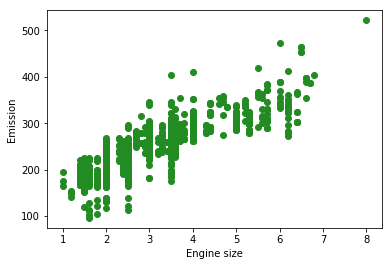

In [6]:
plt.scatter(cdf.engine_size, cdf.co2_emissions,  color='forestgreen')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Creating train and test dataset

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Train data distribution

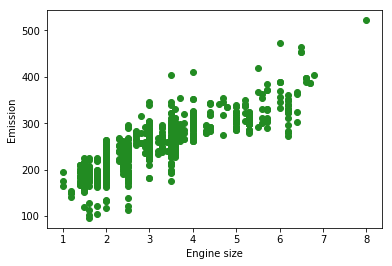

In [8]:
plt.scatter(train.engine_size, train.co2_emissions,  color='forestgreen')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Multiple Regression Model

In [9]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

x = np.asanyarray(train[['engine_size', 'cylinders', 'fuel_consumption_comb']])
y = np.asanyarray(train[['co2_emissions']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 3.48566551  6.58341794 14.27129084]]


## Prediction

In [10]:
y_hat= regr.predict(test[['engine_size', 'cylinders', 'fuel_consumption_comb']])
x = np.asanyarray(test[['engine_size', 'cylinders', 'fuel_consumption_comb']])
y = np.asanyarray(test[['co2_emissions']])
print("Residual sum of squares: %.2f"% np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 334.41
Variance score: 0.90


This time using FUEL CONSUMPTION in CITY and FUEL CONSUMPTION in HWY instead of FUELCONSUMPTION_COMB. 

In [11]:
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy']])
y = np.asanyarray(train[['co2_emissions']])
regr.fit (x, y)

print ('Coefficients: ', regr.coef_)

y_= regr.predict(test[['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy']])
x = np.asanyarray(test[['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy']])
y = np.asanyarray(test[['co2_emissions']])

print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[3.58963581 6.57249184 7.779742   6.48342815]]
Residual sum of squares: 333.08
Variance score: 0.90
